In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3, suppress=True)

# Importing a dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))[:, 0]

# Fitting SVR to the dataset

In [11]:
from sklearn.svm import SVR

In [12]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Predicting a new result

In [13]:
sc_y.inverse_transform(
    regressor.predict(
        sc_X.transform(np.array([[6.5]]))
    )
)

array([170370.02])

# Visualising the SVR results

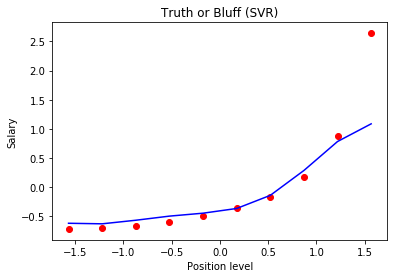

In [14]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)

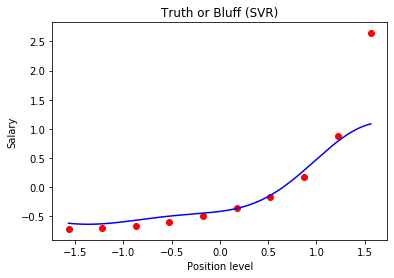

In [15]:
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()